## Analise Imóveis para Aluguel

Essa analise tem como objetivo analisar a base de dados de imóveis e entender:

* Estado com maior quantidade de imóveis para alugar
* Valor Médio, Moda e Mediana dos valores de aluguel
* Imobiliária que concentra a maior quantidade de imóveis para alugar
* Média de dias que o anúncio fica ativo

### Fonte de dados

Fonde de dados: https://www.kaggle.com/datasets/shashanks1202/apartment-rent-data  

### Bibliotecas

In [1]:
# Utilizado para analise e manipulação de dados
import pandas as pd

# Utilizado para manipulação de datas
import datetime
from datetime import date

# Utilziado para criação e manipulação de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Utilizado para criação de mapas
import folium
from folium import plugins

# Utilizado para não exibir alertas. 
import warnings

In [2]:
# não aparecer alertras de versionamentos

warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Comando para exibir todas as colunas

pd.set_option('display.max_columns', None)

### Importando a base

In [51]:
df = pd.read_csv('dataset.csv', sep=';', encoding='latin-1')

In [52]:
df.head()

,Imobiliaria,Banheiros,Quartos,Tamanho,Latitude,Longitude,Dias_Anuncio,VL_Aluguel,Dia,Mes,Ano
0,RentLingo,1.0,1.0,800,29.4624,-98.5253,1724,729.0,26,12,2019
1,RentLingo,1.0,1.0,650,30.3054,-97.7497,1724,1060.0,26,12,2019
2,RentLingo,1.0,1.0,797,30.5118,-97.6873,1724,1003.0,26,12,2019
3,RentLingo,1.0,1.0,444,30.3054,-97.7497,1724,837.0,26,12,2019
4,RentLingo,1.0,1.0,692,30.3054,-97.7497,1724,1020.0,26,12,2019


In [6]:
# Tamanho da base

df.shape

(99492, 22)

In [7]:
# Tipos das variáveis

df.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

In [8]:
# Verificando se possuem valores nulos

df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [9]:
# Verificando se possue valores duplicados

df[df.duplicated()]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
41958,5508806580,housing/rent/apartment,"Las Vegas, prime location Two BR, Apartment. P...",Live in the middle of it all! South is a pet f...,"Gym,Parking,Pool",2.0,2.0,USD,No,Yes,"Cats,Dogs",1335.0,"$1,335",Monthly,1084,NaN,Las Vegas,NV,36.1536,-115.1965,RentDigs.com,1568754086
41959,5508806428,housing/rent/apartment,Northglenn Value. Pet OK!,"Square footage: 738 square ft, unit number: 06...","Gym,Parking,Pool,Storage",1.0,1.0,USD,No,Yes,"Cats,Dogs",1331.0,"$1,331",Monthly,738,NaN,Northglenn,CO,39.8999,-104.9442,RentDigs.com,1568754072
41960,5508806391,housing/rent/apartment,Apartment in move in condition in District Hei...,Capital Courts has something for everyone. Loc...,"AC,Parking,Playground,Pool",1.5,3.0,USD,No,Yes,NaN,1320.0,"$1,320",Monthly,943,NaN,District Heights,MD,38.8516,-76.8871,RentDigs.com,1568754069
41961,5508806299,housing/rent/apartment,"District Heights, prime location Two BR, Apart...",Income Requirement: Must have 2. 5x the rent i...,Parking,1.0,2.0,USD,No,Yes,NaN,1349.0,"$1,349",Monthly,931,NaN,District Heights,MD,38.8516,-76.8871,RentDigs.com,1568754061
41962,5508806233,housing/rent/apartment,"Spacious One BR, One BA","Square footage: 680 sq-ft, unit number: 122. P...","Basketball,Gym,Patio/Deck,Playground,Pool",1.0,1.0,USD,No,Yes,NaN,1260.0,"$1,260",Monthly,680,NaN,Denver,CO,39.8999,-104.9442,RentDigs.com,1568754056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83243,5197839500,housing/rent/apartment,"Apartment, Studio, 400 sq. ft. - in a great area.",Apartment for rent in Ruckersville. Dogs Dogs ...,NaN,1.0,0.0,USD,No,No,NaN,725.0,$725,Monthly,400,NaN,Ruckersville,VA,38.2203,-78.3844,RentDigs.com,1550823878
83244,5197836604,housing/rent/apartment,offers the lifestyle you deserve in the center...,"Our pet friendly one, 2 and 3 beds apartment h...",NaN,2.0,2.0,USD,No,Yes,NaN,1237.0,"$1,237",Monthly,1051,NaN,Charlotte,NC,35.3201,-80.7409,RentDigs.com,1550823780
83245,5197834189,housing/rent/apartment,"Attractive Two BR, Two BA. Pet OK!","Square footage: 1055 square feet, unit number:...","Gym,Parking,Pool",2.0,2.0,USD,No,Yes,"Cats,Dogs",1476.0,"$1,476",Monthly,1055,NaN,Tempe,AZ,33.3924,-111.9265,RentDigs.com,1550823679
83246,5197828852,housing/rent/apartment,The Best of the Best in the City of Tempe! Sav...,In the heart of vibrant Tempe near Arizona Sta...,"Gym,Parking,Pool",2.0,3.0,USD,No,Yes,NaN,1877.0,"$1,877",Monthly,1261,NaN,Tempe,AZ,33.3924,-111.9265,RentDigs.com,1550823091


In [10]:
# Excluindo os valores duplicados

df = df.drop_duplicates()

In [11]:
# Renomeando as colunas do ingles para o portugues

df.columns = ['Id_imovel',
              'Categoria',
              'Titulo',
              'Descricao',
              'Comodidades',
              'Banheiros',
              'Quartos',
              'Moeda',
              'Taxa',
              'Foto_Anuncio',
              'Permite_Pets',
              'VL_Aluguel',
              'VL_Aluguel_Exibido',
              'Tipo_Aluguel',
              'Tamanho',
              'Endereco',
              'Cidade',
              'Estado',
              'Latitude',
              'Longitude',
              'Imobiliaria',
              'Inclusao']

In [12]:
df.head()

,Id_imovel,Categoria,Titulo,Descricao,Comodidades,Banheiros,Quartos,Moeda,Taxa,Foto_Anuncio,Permite_Pets,VL_Aluguel,VL_Aluguel_Exibido,Tipo_Aluguel,Tamanho,Endereco,Cidade,Estado,Latitude,Longitude,Imobiliaria,Inclusao
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [13]:
# Após analisar as colunas e entender os nossos objetivos, vamos excluir algumas colunas

## Colunas que serão consideradas:

colunas = ['Categoria', 'Comodidades', 'Banheiros', 'Quartos', 'Taxa', 'Tamanho', 'Estado', 'Imobiliaria', 'Inclusao', 'VL_Aluguel', 'Latitude', 'Longitude']

df_analise = pd.DataFrame(df, columns=colunas)
df_analise.head()

,Categoria,Comodidades,Banheiros,Quartos,Taxa,Tamanho,Estado,Imobiliaria,Inclusao,VL_Aluguel,Latitude,Longitude
0,housing/rent/apartment,NaN,1.0,1.0,No,542,CA,RentLingo,1577360355,2195.0,33.8520,-118.3759
1,housing/rent/apartment,NaN,1.5,3.0,No,1500,VA,RentLingo,1577360340,1250.0,37.0867,-76.4941
2,housing/rent/apartment,NaN,2.0,3.0,No,1650,NC,RentLingo,1577360332,1395.0,35.8230,-78.6438
3,housing/rent/apartment,NaN,1.0,2.0,No,820,CA,RentLingo,1577360330,1600.0,38.3622,-121.9712
4,housing/rent/apartment,NaN,1.0,1.0,No,624,NM,RentLingo,1577360308,975.0,35.1038,-106.6110


In [14]:
# Tamanho do nosso novo dataframe

df_analise.shape

(99408, 12)

In [15]:
# Verificando os valores nulos

df_analise.isnull().sum()

Categoria          0
Comodidades    16034
Banheiros         63
Quartos          124
Taxa               0
Tamanho            0
Estado           302
Imobiliaria        0
Inclusao           0
VL_Aluguel         1
Latitude          25
Longitude         25
dtype: int64

In [16]:
# Podemos observar que temos 302 estados com valores nulos. Faremos a exclusão para não enviezar a analise

df_analise = df_analise.dropna(subset=['Estado'], how='all')

In [17]:
# Quantidade de anúncios por estados

df_analise.groupby('Estado').size()

Estado
AK       58
AL      354
AR      598
AZ     2376
CA    10301
CO     6279
CT      509
DC       93
DE        7
FL     5773
GA     4750
HI       31
IA      372
ID       96
IL     1036
IN      509
KS      899
KY      995
LA     1345
MA     5023
MD     5276
ME       32
MI      710
MN      581
MO     1203
MS      107
MT       87
NC     6293
ND      743
NE     1020
NH      735
NJ     4444
NM       24
NV     2813
NY      659
OH     4899
OK      934
OR      277
PA     1122
RI      119
SC      908
SD       86
TN     1114
TX    11250
UT      809
VA     8278
VT      125
WA     2595
WI      430
WV       13
WY       16
dtype: int64

In [18]:
# Organizando em ordem decrescente para avaliar quais os estados com maior quantidade de anúncio de imóveis

df_estado = df_analise.groupby('Estado').size().reset_index().sort_values(by=0, ascending=False)

# Renomeando as colunas para facilitar o entendimento

df_estado.columns = ['Estado', 'Qtd_Imóveis'].copy()
df_estado.head()

,Estado,Qtd_Imóveis
43,TX,11250
4,CA,10301
45,VA,8278
27,NC,6293
5,CO,6279


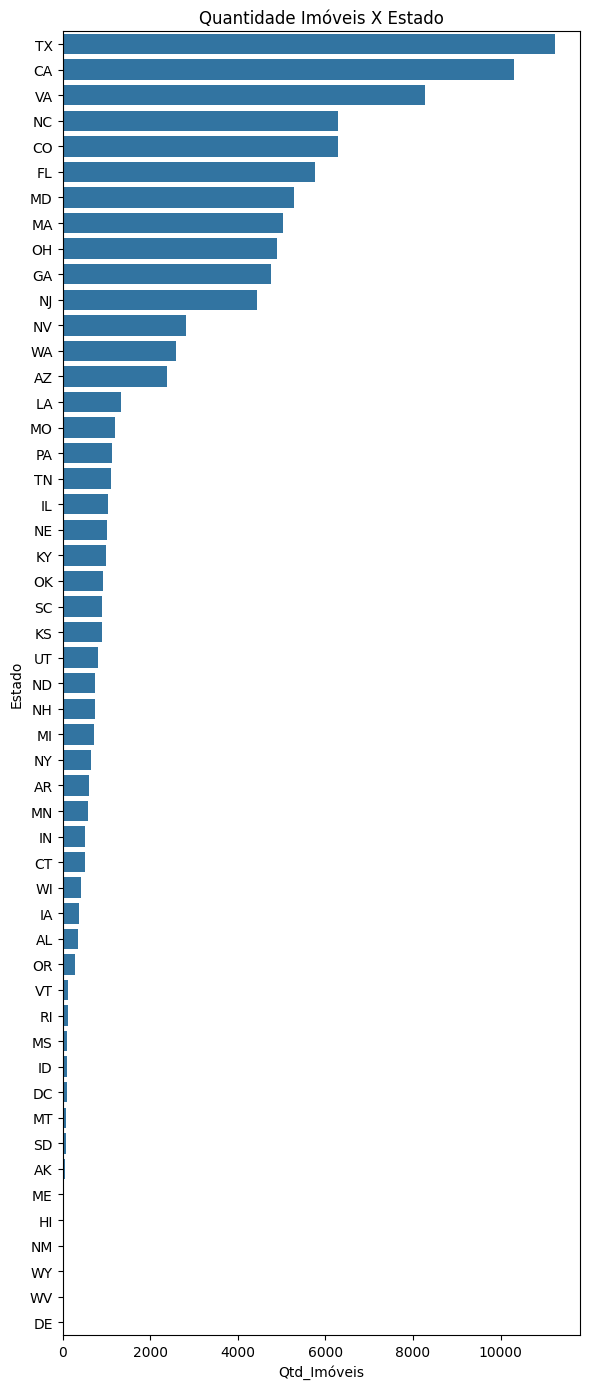

In [19]:
# Gerando um gráfico de Qtd imóveis X Estado

plt.rcParams['figure.figsize'] = [6.00, 14.00]
plt.rcParams['figure.autolayout'] = True

sns.barplot(x = df_estado['Qtd_Imóveis'], y = df_estado['Estado'], orient = 'h').set_title('Quantidade Imóveis X Estado')
# salva a imagem do gráfico na pasta que o código está
plt.savefig('Estado.png', format='png')
plt.show()

#### Primeira Conclusão

O estado com mais imóveis disponíveis para alugar é o Texas (TX)

Agora vamos analisar somente o Texas

In [20]:
# Filtrando o estado do Texas

df_texas = df_analise[df_analise['Estado'] == 'TX']

In [21]:
# Verificando se há valores nulos nas colunas

df_texas.isnull().sum()

Categoria         0
Comodidades    1708
Banheiros        16
Quartos           5
Taxa              0
Tamanho           0
Estado            0
Imobiliaria       0
Inclusao          0
VL_Aluguel        0
Latitude          0
Longitude         0
dtype: int64

In [23]:
# Vamos preencher os valores nulos das colunas banheiro e quartos utilizando a média das colunas

df_texas['Banheiros'] = round(df_texas['Banheiros'].fillna(df_texas['Banheiros'].mean()),0)
df_texas['Quartos'] = round(df_texas['Quartos'].fillna(df_texas['Quartos'].mean()),0)

C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_15984\805411555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Banheiros'] = round(df_texas['Banheiros'].fillna(df_texas['Banheiros'].mean()),0)
C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_15984\805411555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Quartos'] = round(df_texas['Quartos'].fillna(df_texas['Quartos'].mean()),0)


### Visualização dos imóveis através de um mapa

In [24]:
# Copiando os dados para uma nova variável

df_localizacao = df_texas.copy()

In [25]:
# excluindos os valores nan das variáveis latitude e longitude

df_localizacao = df_localizacao.dropna(subset=['Latitude', 'Longitude'])

In [26]:
# juntando latitude e longitude em uma nova coluna. Importante converter os valores para str para não ter erro

df_localizacao['lat_lon'] = df_localizacao['Latitude'].astype(str) + ' - ' + df_localizacao['Longitude'].astype(str)

In [27]:
# Agrupando os dados por coluna para saber a quantidade por localização

df_agrup = df_localizacao.groupby(['Latitude', 'Longitude', 'lat_lon']).size().reset_index()

In [28]:
df_agrup.columns = ['Latitude', 'Longitude', 'Lat_Lon', 'Qtd_Imoveis']

In [29]:
# Separando agrupamentos com quantidade de imóveis > 10

df_agrup = df_agrup.loc[(df_agrup['Qtd_Imoveis'] >10 )]

In [30]:
# Criando as variáveis para criação do mapa

latitude = df_agrup['Latitude'].values
longitude = df_agrup['Longitude'].values

In [31]:
# Criando o mapa

## A laitude fornecida abaixo é a do EUA

mapa = folium.Map(location= [37.090240, -95.712891], zoom_start=5)

## Criando marcadores para localidade

for lat, lon in zip(latitude, longitude):
    folium.Marker(location=[lat,lon]).add_to(mapa)

## Titulo do mapa
titulo_mapa = "Concentração de Imóveis por Região"

## Configuração em css para o título
titulo = f'<h1 style="postion:absolute;z-index:10000;left:15vw","font-size:20px"> {titulo_mapa}</h1>'
mapa.get_root().html.add_child(folium.Element(titulo))

## Mostrando o mapa
mapa

In [32]:
# Verificando os valores médios, mediana e moda dos valores de aluguel

print('Média dos aluguéis: ', round(df_texas['VL_Aluguel'].mean(), 2))
print('Mediana dos aluguéis: ', round(df_texas['VL_Aluguel'].median(), 2))
print('Moda dos aluguéis: ', round(df_texas['VL_Aluguel'].mode(), 2))

Média dos aluguéis:  1217.5
Mediana dos aluguéis:  1140.0
Moda dos aluguéis:  0    975.0
Name: VL_Aluguel, dtype: float64


#### 2º Conclusão

Os valores médios dos aluguéis são: 1217,5

A mediana dos aluguéis é: 1140,0

E a moda dos aluguéis é: 975,0

In [33]:
# Qual imobiliaria possui maior quantidade de anuncios

df_imobiliaria = df_texas.groupby(['Imobiliaria']).size().reset_index().sort_values(by=0, ascending=False)
df_imobiliaria.columns = ['Imobiliaria', 'Qtd_Imoveis']
df_imobiliaria.head()

,Imobiliaria,Qtd_Imoveis
7,RentDigs.com,9653
9,RentLingo,1411
1,GoSection8,102
3,ListedBuy,35
6,RealRentals,26


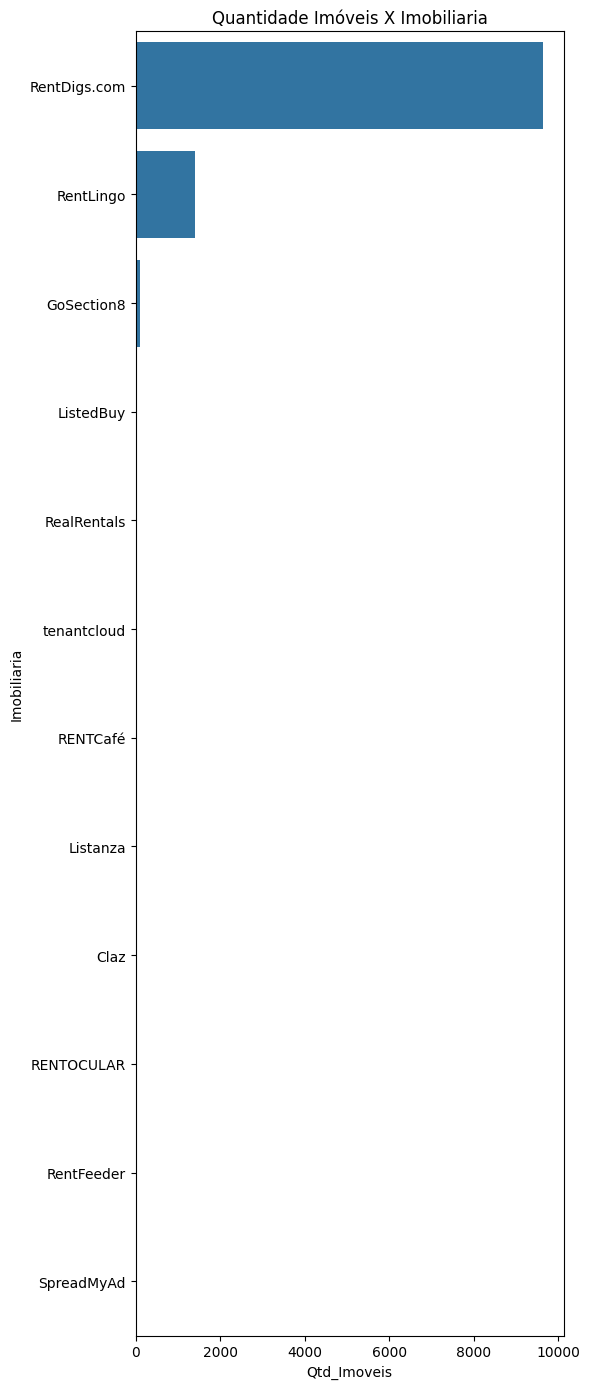

In [34]:
# Gerando um gráfico de Qtd imóveis X Estado

plt.rcParams['figure.figsize'] = [6.00, 14.00]
plt.rcParams['figure.autolayout'] = True

sns.barplot(x = df_imobiliaria['Qtd_Imoveis'], y = df_imobiliaria['Imobiliaria'], orient = 'h').set_title('Quantidade Imóveis X Imobiliaria')
# salva a imagem do gráfico na pasta que o código está
plt.savefig('Imobiliaria.png', format='png')
plt.show()

#### Conclusão

A imobiliária que tem a maior quantidade de anuncios é a **RentDigs.com**

In [35]:
# Criando uma função para converter a data de inclusão do anuncio

def converter_data(x):
    return date.fromtimestamp(x)

In [36]:
# Convertendo a coluna inclusão para data

df_texas['Data_Inclusao'] = df_texas['Inclusao'].apply(converter_data)

C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_15984\4148399829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Data_Inclusao'] = df_texas['Inclusao'].apply(converter_data)


In [37]:
# Ajustando o formato de data

df_texas['Data_Inclusao'] = pd.to_datetime(df_texas['Data_Inclusao'], format= '%Y/%m/%d')

C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_15984\3174305227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Data_Inclusao'] = pd.to_datetime(df_texas['Data_Inclusao'], format= '%Y/%m/%d')


In [38]:
# Extraindo o ano da data

df_texas['Ano'] = df_texas['Data_Inclusao'].dt.year

C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_15984\1312714337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Ano'] = df_texas['Data_Inclusao'].dt.year


In [39]:
# Extraindo mes da data

df_texas['Mes'] = df_texas['Data_Inclusao'].dt.month

C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_15984\4086657486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Mes'] = df_texas['Data_Inclusao'].dt.month


In [40]:
# Extraindo o dia da data

df_texas['Dia'] = df_texas['Data_Inclusao'].dt.day

C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_15984\599971451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Dia'] = df_texas['Data_Inclusao'].dt.day


In [41]:
# Criando uma variavel com a data atual

data_atual = datetime.datetime.now()

In [42]:
# Quantidade dos anos de anuncio

df_texas['Anos_Anuncio'] = (data_atual.year - df_texas['Ano'])

C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_15984\980672013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Anos_Anuncio'] = (data_atual.year - df_texas['Ano'])


In [43]:
# Quantidade de dias do anuncio

df_texas['Dias_Anuncio'] = (data_atual - df_texas['Data_Inclusao']).dt.days

C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_15984\3023692042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Dias_Anuncio'] = (data_atual - df_texas['Data_Inclusao']).dt.days


In [44]:
df_texas.head()

,Categoria,Comodidades,Banheiros,Quartos,Taxa,Tamanho,Estado,Imobiliaria,Inclusao,VL_Aluguel,Latitude,Longitude,Data_Inclusao,Ano,Mes,Dia,Anos_Anuncio,Dias_Anuncio
16,housing/rent/apartment,NaN,1.0,1.0,No,800,TX,RentLingo,1577360099,729.0,29.4624,-98.5253,2019-12-26,2019,12,26,5,1724
21,housing/rent/apartment,"Fireplace,Gym,Parking,Pool,Storage,Wood Floors",1.0,1.0,No,650,TX,RentLingo,1577359827,1060.0,30.3054,-97.7497,2019-12-26,2019,12,26,5,1724
22,housing/rent/apartment,"Gated,Pool",1.0,1.0,No,797,TX,RentLingo,1577359796,1003.0,30.5118,-97.6873,2019-12-26,2019,12,26,5,1724
23,housing/rent/apartment,"Dishwasher,Parking,Pool",1.0,1.0,No,444,TX,RentLingo,1577359784,837.0,30.3054,-97.7497,2019-12-26,2019,12,26,5,1724
24,housing/rent/apartment,"Dishwasher,Parking,Pool",1.0,1.0,No,692,TX,RentLingo,1577359778,1020.0,30.3054,-97.7497,2019-12-26,2019,12,26,5,1724


In [45]:
# Média de dias que o anuncio está ativo

print('A média de dias que o anuncio está ativo é: ', df_texas['Dias_Anuncio'].mean().astype(int), 'dias')

A média de dias que o anuncio está ativo é:  1918 dias


In [46]:
# Filtrando as principais variáveis numéricas

colunas_numericas = ('Banheiros', 'Quartos','Tamanho', 'VL_Aluguel')

df_numerica = pd.DataFrame(df_texas, columns=colunas_numericas)

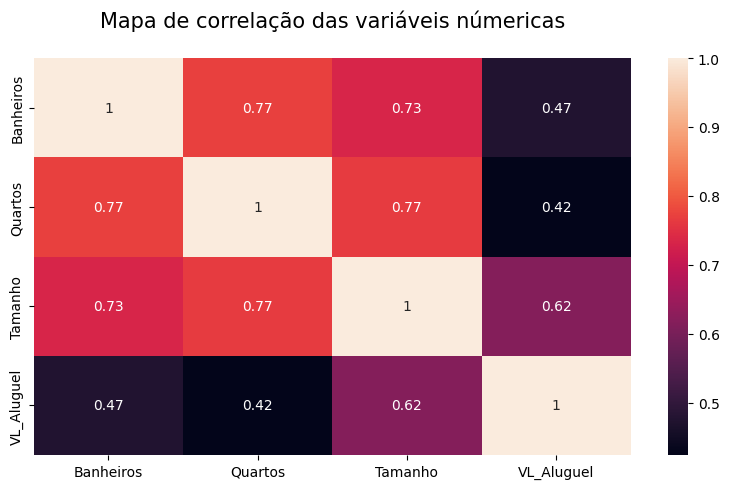

In [47]:
# Correlação entre as variáveis

plt.figure(figsize = (8,5))
sns.heatmap(df_numerica.corr(), annot = True)
plt.title('Mapa de correlação das variáveis númericas\n', fontsize = 15)
plt.show()

#### 3º Conclusão

Podemos ver que há algumas prováveis correlações entre:

* Qtd Quarto x Qtd Banheiro
* Tamanho x Qtd Banheiros
* Tamanho x Qtd Quartos

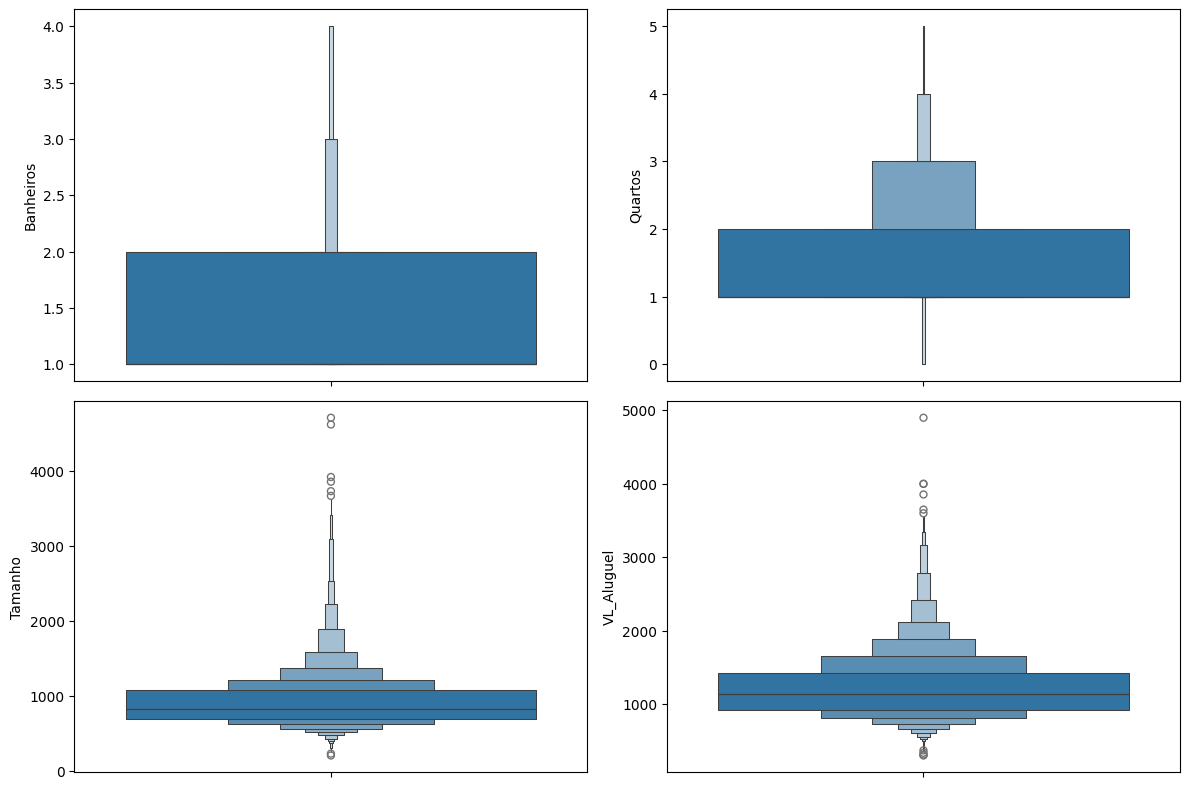

In [48]:
# Verificando valores outliers

plt.rcParams['figure.figsize'] = [12.00, 8.00]
plt.rcParams['figure.autolayout'] = True
f, axes = plt.subplots(2,2)

linha = 0
coluna = 0

for i in colunas_numericas:
    sns.boxenplot(data = df_texas, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

#### 4º Conclusão

Podemos ver que temos alguns valores outliers na quantidade de banheiros, no tamanho e no valor do aluguel, mas não há na quantidade de quartos

In [49]:
# Salvando os dados tratados

## Somente as colunas abaixo serão consideradas
colunas_exportar = ['Imobiliaria', 'Banheiros', 'Quartos', 'Tamanho', 'Latitude', 'Longitude', 'Dias_Anuncio', 'VL_Aluguel', 'Dia', 'Mes', 'Ano']

## Criando o dataframe com as colunas que utilizaremos
df_texas = pd.DataFrame(df_texas, columns=colunas_exportar)

## Exportando para CSV
df_texas.to_csv('dados_tratados.csv', index=False)